In [51]:
#!pip install tensorflow pandas numpy scikit-learn matplotlib

# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Load data from CSV
df = pd.read_csv('boston_housing.csv')

In [53]:
# View dataset info
print("Dataset Info:")
df.info()
print("_" * 40)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
________________________________________


In [54]:
# Separate features and target
X = df.drop('MEDV', axis=1)  # Replace 'MEDV' if target column has a different name
y = df['MEDV']

In [55]:
# Preview the data
print("\nFirst 10 rows of feature data:")
print(X.head(10))


First 10 rows of feature data:
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  


In [56]:
# Summary statistics
print("\nFeature statistics:")
print(X.describe())


Feature statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Create column transformer (normalize numerical columns)
ct = make_column_transformer(
    (MinMaxScaler(), X.columns)
)

In [59]:
# Normalize and convert data type
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32').values
y_test = y_test.astype('float32').values

In [60]:
# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [61]:
# Set random seed
tf.random.set_seed(42)

In [62]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
    tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(units=1, name='Prediction')
])

C:\Users\91776\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# Compile the model
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['mse']
)

In [64]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 484.7097 - mse: 484.7097 - val_loss: 121.1840 - val_mse: 121.1840
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132.7619 - mse: 132.7619 - val_loss: 58.6547 - val_mse: 58.6547
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.8493 - mse: 85.8493 - val_loss: 37.2339 - val_mse: 37.2339
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.4772 - mse: 67.4772 - val_loss: 31.3148 - val_mse: 31.3148
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.9413 - mse: 57.9413 - val_loss: 26.8988 - val_mse: 26.8988
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.5302 - mse: 50.5302 - val_loss: 23.1085 - val_mse: 23.1085
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.3999 - mse: 44.3999 - val_loss: 20.1913 - val_mse: 20.1913
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.3808 - mse: 39.3808 - val_loss: 17.8915 - val_mse: 17.8915
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━

In [65]:
# Preview mean values
print("\nMean values:")
print(f"Training target mean: {y_train.mean():.2f}")
print(f"Validation target mean: {y_val.mean():.2f}")


Mean values:
Training target mean: 22.86
Validation target mean: 22.21


In [66]:
# Evaluate the model on the test set
print("\nEvaluation on Test Data:")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"Model loss on test set: {loss}")
print(f"Model mean squared error on test set: {mse:.2f}")



Evaluation on Test Data:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2974 - mse: 9.2974 
Model loss on test set: 13.699721336364746
Model mean squared error on test set: 13.70


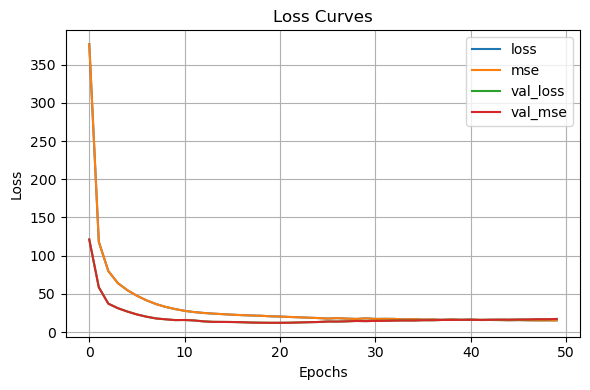

In [67]:
# Plot the loss curves
pd.DataFrame(history.history).plot(
    figsize=(6, 4),
    xlabel="Epochs",
    ylabel="Loss",
    title='Loss Curves'
)
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# Make predictions
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [69]:
# View the first prediction
print("\nFirst prediction vs actual:")
print(f"Predicted: {y_pred[0][0]:.2f}, Actual: {y_test[0]:.2f}")


First prediction vs actual:
Predicted: 25.07, Actual: 23.60


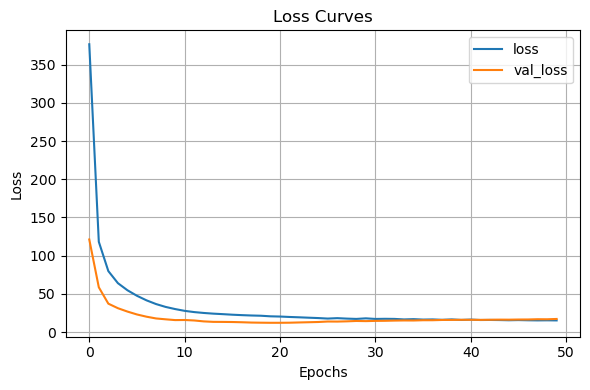

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot training and validation loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(
    figsize=(6, 4),
    xlabel="Epochs",
    ylabel="Loss",
    title="Loss Curves"
)
plt.grid(True)
plt.tight_layout()
plt.show()


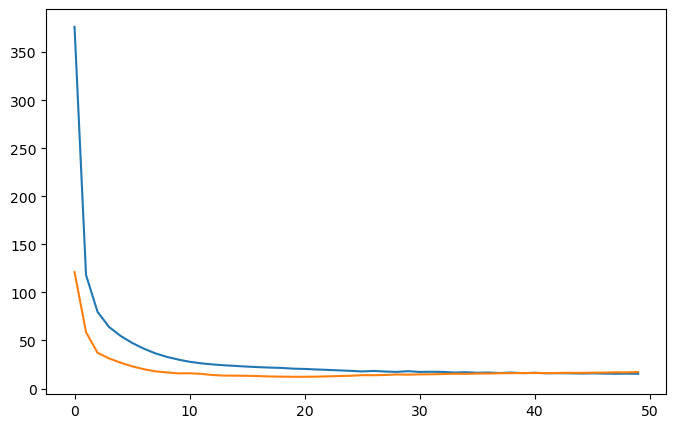

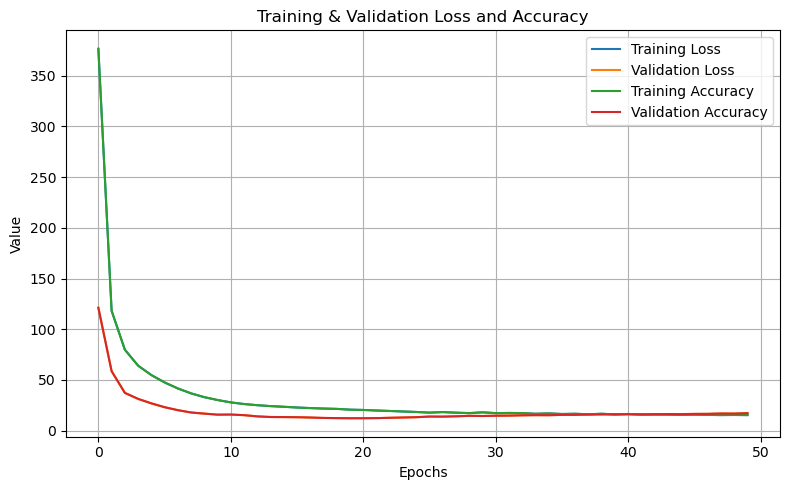

In [106]:
# Extract the relevant metrics
history_df = pd.DataFrame(history.history)

# Plot all four lines
plt.figure(figsize=(8, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['mse'], label='Training Accuracy')
plt.plot(history_df['val_mse'], label='Validation Accuracy')

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training & Validation Loss and Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
